In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score

In [415]:
data=pd.read_csv('customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [416]:
#Checking for Na
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [418]:
# change the type of SeniorCitizen  to categorical
data['SeniorCitizen']=data['SeniorCitizen'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [419]:
data.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [420]:
# so we have imblance frequency in churn column
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [421]:
#Split X and Y
X=data[['SeniorCitizen','tenure','MonthlyCharges']]
y=data['Churn']

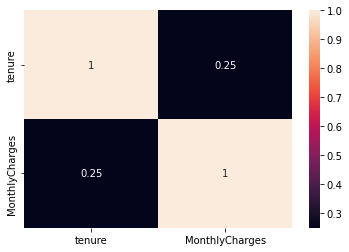

In [422]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [423]:
# Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [424]:
#Split Categorical and Numercial Columns
X_train_df= pd.DataFrame(X_train,columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(include = 'object')
X_test_cat  = X_test_df.select_dtypes(include = 'object')


In [425]:
display(X_train_cat)
display(X_train_num)

,SeniorCitizen
2663,0
2894,0
2265,0
4908,1
3621,0
...,...
3915,0
1428,0
6537,0
4367,1


,tenure,MonthlyCharges
2663,59,109.15
2894,48,60.35
2265,12,112.95
4908,28,106.15
3621,2,24.40
...,...,...
3915,59,81.25
1428,1,50.45
6537,70,115.65
4367,36,54.10


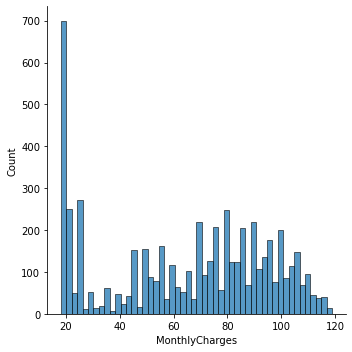

In [426]:
sns.displot(x = "MonthlyCharges", data = X_train_num , bins = 50)
plt.show()

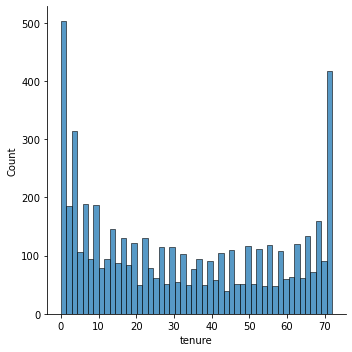

In [427]:
sns.displot(x = "tenure", data = X_train_num , bins = 50)
plt.show()

In [428]:
# Normalizing Categorical
encoder = OneHotEncoder(drop='first')
encoder.fit(X_train_cat)
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names(input_features=X_train_cat.columns)
X_train_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=cols,)
X_train_encoded_df

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,SeniorCitizen_1
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
5629,0.0
5630,0.0
5631,0.0
5632,1.0


In [429]:
# Concatinate Cat encoded and Numerical
X_train_encoded = np.concatenate([X_train_cat_encoded,X_train_num], axis=1)
X_train_scaled_df = pd.DataFrame(X_train_transformed, columns=X_train_df.columns)
X_train_scaled_df

,SeniorCitizen,tenure,MonthlyCharges
0,0.0,59.0,109.15
1,0.0,48.0,60.35
2,0.0,12.0,112.95
3,1.0,28.0,106.15
4,0.0,2.0,24.40
...,...,...,...
5629,0.0,59.0,81.25
5630,0.0,1.0,50.45
5631,0.0,70.0,115.65
5632,1.0,36.0,54.10


In [430]:
# Apply Transformer and Train Fit for Combined Transformed
transformer = PowerTransformer()
transformer.fit(X_train_scaled_df)
X_train_scaled_total = transformer.transform(X_train_scaled_df)
X_train_scaled = pd.DataFrame(X_train_scaled_df, columns=X_train_scaled_df.columns)

In [431]:
# One hot coded to Test Ctegorical
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test_df = pd.DataFrame(encoded_test_cat, columns=cols)
onehot_encoded_test_df.head()

,SeniorCitizen_1
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [432]:
# Concatinate Cat encoded and Numerical
X_test_encoded = np.concatenate([encoded_test_cat,X_test_num], axis=1)
X_test_total_df = pd.DataFrame(X_train_transformed, columns=X_test_df.columns)
X_test_total_df

,SeniorCitizen,tenure,MonthlyCharges
0,0.0,59.0,109.15
1,0.0,48.0,60.35
2,0.0,12.0,112.95
3,1.0,28.0,106.15
4,0.0,2.0,24.40
...,...,...,...
5629,0.0,59.0,81.25
5630,0.0,1.0,50.45
5631,0.0,70.0,115.65
5632,1.0,36.0,54.10


In [433]:
# Apply Transfomer to Test
X_test_scaled= transformer.transform(X_test_encoded)
X_test_scaled

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([[-0.43832482, -0.0301234 , -1.50924651],
       [-0.43832482,  1.34627434, -0.14385396],
       [-0.43832482,  0.53175174,  0.78673831],
       ...,
       [-0.43832482, -0.6577616 , -1.50392919],
       [-0.43832482,  1.20646976, -1.3262365 ],
       [-0.43832482, -0.29059495,  0.79641973]])

In [434]:
#Apply Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.75


/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [435]:
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [459]:
#accuracy
print("The accuracy in the TRAIN set is: {:.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The accuracy in the TEST  set is: {:.3f}".format(accuracy_score(y_test, y_test_pred)))

#Precission
print("The precission in the TRAIN set is: {:.3f}".format(precision_score(y_train, y_train_pred, pos_label="Yes")))
print("The precission in the TEST  set is: {:.3f}".format(precision_score(y_test, y_test_pred, pos_label="Yes")))

#Recall
print("The recall in the TRAIN set is: {:.3f}".format(recall_score(y_train, y_train_pred, pos_label="Yes")))
print("The recall in the TEST  set is: {:.3f}".format(recall_score(y_test,  y_test_pred, pos_label="Yes")))
#f1_score
print("The F1-score for the TRAIN set is {:.2f}".format(f1_score(y_train,y_train_pred, pos_label="Yes")))
#Kappa
print("The kappa in the TRAIN- set is: {:.2f}".format(cohen_kappa_score(y_train,y_train_pred)))
print("The kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))


The accuracy in the TRAIN set is: 0.786
The accuracy in the TEST  set is: 0.754
The precission in the TRAIN set is: 0.646
The precission in the TEST  set is: 0.000


/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The recall in the TRAIN set is: 0.458
The recall in the TEST  set is: 0.000
The F1-score for the TRAIN set is 0.54
The kappa in the TRAIN- set is: 0.40
The kappa in the TEST set is: 0.14


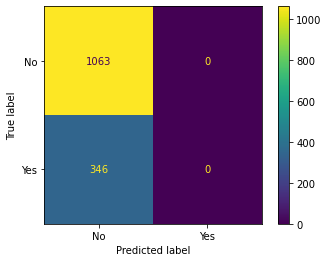

In [437]:
#we fail to identify churn "yes" at all
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=disp, display_labels=lr.classes_)
disp.plot()
plt.show()

In [438]:
from imblearn.over_sampling import SMOTE

In [439]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [440]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5634, 3)
(8222, 3)


In [458]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label="Yes")))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label="Yes")))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label="Yes")))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))


The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.39
The recall in the TEST set is: 0.26
The F1 in the TEST set is: 0.31
The Kappa in the TEST set is: 0.14


/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


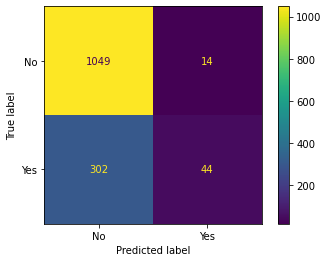

In [454]:
cm_test = confusion_matrix(y_test,y_pred_test)
cm_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
cm_test .plot()
plt.show()

In [443]:
from imblearn.under_sampling import TomekLinks 

In [444]:
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train_scaled, y_train)
display(pd.concat([X_train_tl,y_train_tl],axis=1).head())

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0.0,59.0,109.15,No
1,0.0,48.0,60.35,Yes
2,0.0,12.0,112.95,Yes
3,1.0,28.0,106.15,Yes
4,0.0,2.0,24.40,Yes


In [445]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tl, y_train_tl)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label="Yes")))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label="Yes")))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label="Yes")))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))


The accuracy in the TEST set is: 0.78
The precision in the TEST set is: 0.76
The recall in the TEST set is: 0.13
The F1 in the TEST set is: 0.22


/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


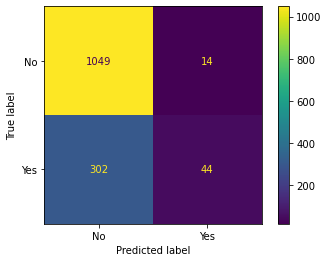

In [455]:
tom_test = confusion_matrix(y_test,y_pred_test)
tom_test = ConfusionMatrixDisplay(confusion_matrix=tom_test, display_labels=lr.classes_)
tom_test.plot()
plt.show()

In [447]:
# Concatinate Cat encoded and Numerical#
#X_test_encoded = np.concatenate([encoded_test_cat,X_test_num], axis=1)
#X_test_scaled_df = pd.DataFrame(X_test_scaled_df, columns=X_test_df.columns)
#X_test_scaled_df

In [448]:
# assign id for join two table for having final Train,I have traiyed concat but the result wasnt corrct so use thid method

###onehot_encoded_test_df['id'] = pd.Series([x for x in range(0,1408)])
##X_test_num['id'] = pd.Series([x for x in range(0,1408)])

#onehot_encoded_test_df.shape
###X_test_num.shape
##display(onehot_encoded_test_df)
#display(X_test_num)

In [449]:
# Combine Numerical and Categorical
#X_test_final = pd.merge(left = X_train_encoded_df, 
                                # right = X_train_num, 
                                # how = 'inner', 
                                # left_on = "id", 
                                # right_on= "id") 
#X_train_final.to_csv('final.csv')

#X_train_final=X_train_final.drop('id',axis=1)
#X_train_final=X_train_final.drop('level_0',axis=1)
#X_train_final=X_train_final.drop('index',axis=1)
#X_train_final.info()

In [450]:
# Normalizing Total_Train
#transformer = PowerTransformer()
#transformer.fit(X_train_final)
#X_train_scaled_np = transformer.transform(X_train_final)
#X_train_scaled = pd.DataFrame(X_train_final, columns=X_train_final.columns)
#X_test_scaled_np = transformer.transform(X_test_num)
#X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test_num.columns)
#X_train_scaled.head()

In [451]:
#sns.displot(x = "tenure", data = X_train_scaled , bins = 50)
#plt.show()

In [452]:
#sns.displot(x = "MonthlyCharges", data = X_train_scaled , bins = 50)
#plt.show()

In [453]:
# assign id for join two table for having final Train,I have traiyed concat but the result wasnt corrct so use thid method
#X_train_num=X_train_num.reset_index()
#X_train_encoded_df['id'] = pd.Series([x for x in range(0,5634)])
#X_train_num['id'] = pd.Series([x for x in range(0,5634)])

#X_train_encoded_df.shape
#X_train_num.shape
#display(X_train_encoded_df)
#display(X_train_num)

# Droping index and creat new Index
#X_train_encoded_df=X_train_encoded_df.reset_index(drop=True)
#X_train_num=X_train_num.reset_index(drop=True)

